https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb (ref) <br/>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
remove_parts = ('headers', 'footers', 'quotes')
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

data_train = fetch_20newsgroups(subset='train', remove=remove_parts, categories=categories)
data_valid = fetch_20newsgroups(subset='test', remove=remove_parts, categories=categories)

In [ ]:
data_train.keys(), data_valid.keys()

(dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR']),
 dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR']))

In [ ]:
len(data_train['data']), len(data_valid['data'])

(2034, 1353)

In [ ]:
print(" ".join(data_train['data'][:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries. 
 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [ ]:
np.array(data_train.target_names)[data_train.target]

array(['comp.graphics', 'talk.religion.misc', 'sci.space', ...,
       'comp.graphics', 'alt.atheism', 'comp.graphics'], dtype='<U18')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html (ref)

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(data_train.data).todense()
vectors.shape

(2034, 26576)

In [ ]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape, vocab[:5], vocab[vocab.shape[0]-5:]

((26576,),
 array(['00', '000', '0000', '00000', '000000'], dtype='<U80'),
 array(['zwak', 'zwakke', 'zware', 'zwarte', 'zyxel'], dtype='<U80'))

In [ ]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html (ref)

In [ ]:
%time U,S,Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 2min 22s, sys: 1min 3s, total: 3min 25s
Wall time: 29 s


In [ ]:
U.shape,S.shape,Vh.shape

((2034, 2034), (2034,), (2034, 26576))

In [ ]:
o = U@np.diag(S)@Vh

In [ ]:
o.shape

(2034, 26576)

In [ ]:
np.allclose(vectors, o)

True

In [ ]:
np.allclose((U@U.T), np.identity(U.shape[0]))

True

In [ ]:
np.allclose((Vh@Vh.T), np.identity(Vh.shape[0]))

True

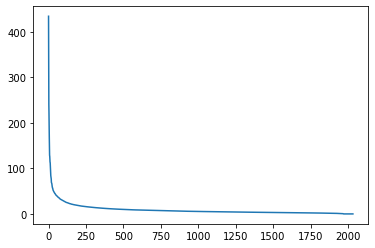

In [ ]:
plt.plot(S);

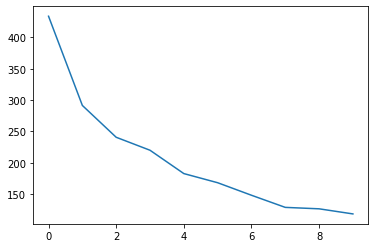

In [ ]:
plt.plot(S[:10]);

In [ ]:
num_top_words = 8 

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words:-1]]
    topic_words = [top_words(t) for t in a]
    return [" ".join(t) for t in topic_words]

In [ ]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal',
 'jpeg gif file color quality image jfif',
 'graphics edu pub mail 128 3d ray',
 'jesus god matthew people atheists atheism does',
 'image data processing analysis software available tools',
 'god atheists atheism religious believe religion argument',
 'space nasa lunar mars probe moon missions',
 'image probe surface lunar mars probes moon',
 'argument fallacy conclusion example true ad argumentum',
 'space larson image theory universe physical nasa']

https://arxiv.org/pdf/1401.5226.pdf (non-negative matrix factorization)

In [ ]:
m,n = vectors.shape
d = 5

In [ ]:
clf = decomposition.NMF(n_components=d, random_state=1)
W1 = clf.fit_transform(vectors)
H1 = clf.components_

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [ ]:
W1.shape,H1.shape

((2034, 5), (5, 26576))

In [ ]:
show_topics(H1)

['jpeg image gif file color images format',
 'edu graphics pub mail 128 ray ftp',
 'space launch satellite nasa commercial satellites year',
 'jesus god people matthew atheists does atheism',
 'image data available software processing ftp edu']

https://tfidf.com/ (tdf-idf)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = tfidf.fit_transform(data_train.data)
vectors_tfidf.shape

(2034, 26576)

In [ ]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_
W1.shape,H1.shape

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


((2034, 5), (5, 26576))

In [ ]:
show_topics(H1)

['people don think just like objective say',
 'graphics thanks files image file program windows',
 'space nasa launch shuttle orbit moon lunar',
 'ico bobbe tek beauchaine bronx manhattan sank',
 'god jesus bible believe christian atheism does']

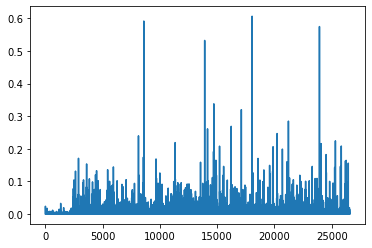

In [ ]:
plt.plot(H1[0]);

In [ ]:
clf.reconstruction_err_

43.71292605795278

https://arxiv.org/abs/0909.4061 (probabilistic algo for matrix decompositionm)

In [ ]:
# C: (m,n) <- original matrix
# U: (m,m) <- left singular vectors
# V: (n,n) <- right singular vectors
# S: (m,n) <- singular values
# SVD(C) = U @ S @ V.transpose() <- (m,m) @ (m,n) @ (n,n)
# time complexity: min(mn^2, m^2n)

In [ ]:
%time U,S,V = decomposition.randomized_svd(vectors, 5)

CPU times: user 12.6 s, sys: 13.9 s, total: 26.5 s
Wall time: 3.75 s


In [ ]:
show_topics(V)

['jpeg image edu file graphics images gif',
 'jpeg gif file color quality image jfif',
 'space jesus launch god people satellite matthew',
 'jesus god matthew people atheists atheism does',
 'image data processing analysis software available tools']

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
data_faces, _ = fetch_olivetti_faces(return_X_y=True, random_state=1)
data_faces = data_faces.transpose()
data_faces.shape

(4096, 400)

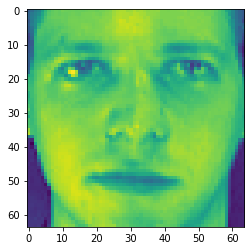

In [ ]:
plt.imshow(data_faces[:,0].reshape(64, 64));

In [ ]:
# n_components=low rank dim
%%time
clf = decomposition.NMF(n_components=100, random_state=1)
W1 = clf.fit_transform(data_faces)
H1 = clf.components_
W1.shape, H1.shape

UsageError: Line magic function `%%time` not found.


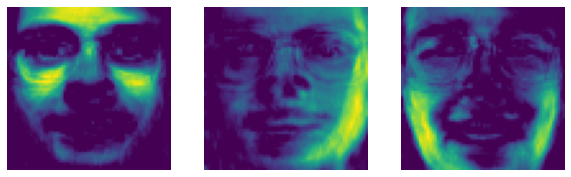

In [ ]:
_,axs = plt.subplots(1, 3, figsize=(10, 3))
for w,ax in zip(W1.transpose(), axs.flat):
    ax.imshow(w.reshape(64, 64))
    ax.axis('off')

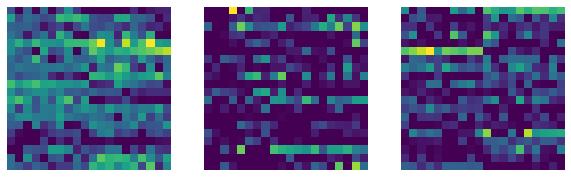

In [ ]:
_,axs = plt.subplots(1, 3, figsize=(10, 3))
for h,ax in zip(H1, axs.flat):
    ax.imshow(h.reshape(20, 20))
    ax.axis('off')

In [ ]:
W1[:,0].min(), W1[:,0].max()

(0.0, 0.4143432)

In [ ]:
hist = np.histogram(W1[:,0], bins=100)
hist[0].shape, hist[1].shape

((100,), (101,))

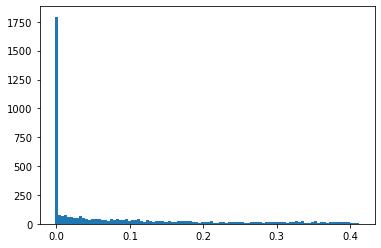

In [ ]:
plt.bar(hist[1][:-1], hist[0], width=(hist[1][1] - hist[1][0]));

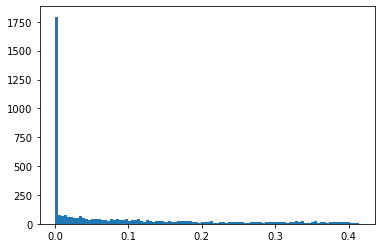

In [ ]:
plt.hist(W1[:,0], bins=100);

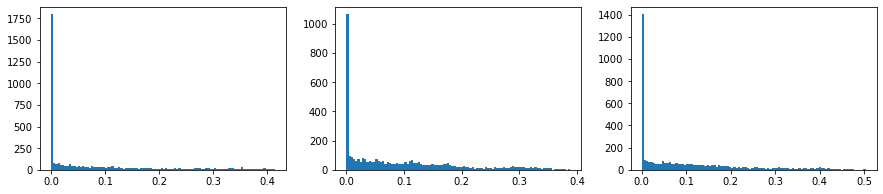

In [ ]:
_,axs = plt.subplots(1, 3, figsize=(15, 3))
for h,ax in zip(W1.transpose(), axs.flat):
    ax.hist(h, bins=100)

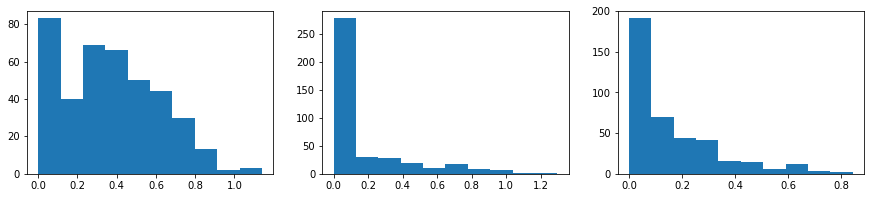

In [ ]:
_,axs = plt.subplots(1, 3, figsize=(15, 3))
for h,ax in zip(H1, axs.flat):
    ax.hist(h)

In [ ]:
rec_images = W1@H1
rec_images.shape

(4096, 400)

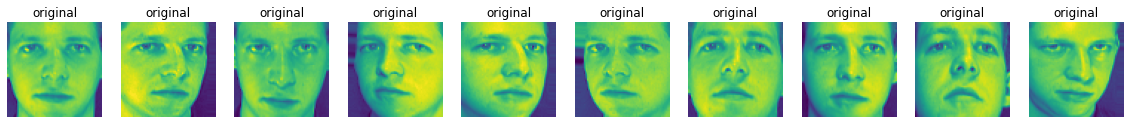

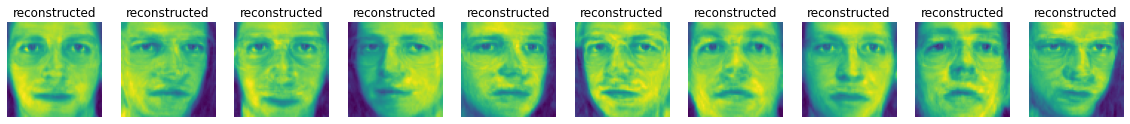

In [ ]:
_,axs = plt.subplots(1, 10, figsize=(20, 20))
for w,ax in zip(data_faces.transpose(), axs.flat):
    ax.imshow(w.reshape(64, 64))
    ax.axis('off')
    ax.set_title('original')

_,axs = plt.subplots(1, 10, figsize=(20, 20))                   
for w,ax in zip(rec_images.transpose(), axs.flat):
    ax.imshow(w.reshape(64, 64))
    ax.axis('off')
    ax.set_title('reconstructed')

In [ ]:
clf.reconstruction_err_

51.7371049377886

In [ ]:
from datasets import load_dataset
import torch
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

https://huggingface.co/datasets/owaiskha9654/PubMed_MultiLabel_Text_Classification_Dataset_MeSH (pubmed dataset)

In [ ]:
data_pub = load_dataset('owaiskha9654/PubMed_MultiLabel_Text_Classification_Dataset_MeSH')
data_pub = np.array(data_pub['train']['abstractText'])
np.random.shuffle(data_pub)
data_pub = data_pub[:1000]
data_pub.shape

Found cached dataset csv (/Users/arun/.cache/huggingface/datasets/owaiskha9654___csv/owaiskha9654--PubMed_MultiLabel_Text_Classification_Dataset_MeSH-133881ae76bc4363/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

(1000,)

In [ ]:
data_pub[1]

'With nearly 2,000 species, Gobiidae is the most specious family of the vertebrates. This high level of speciation is accompanied by conspicuous karyotypic modifications, where the role of repetitive sequences remains largely unknown. This study analyzed the karyotype of 2 species of the genus Gobionellus and mapped 18S and 5S ribosomal RNA genes and (CA)15 microsatellite sequences onto their chromosomes. G. oceanicus (2n = 56; ? 12 metacentrics (m) + 4 submetacentrics (sm) + 1 subtelocentric (st) + 39 acrocentrics (a); ? 12m + 4sm + 2st + 38a) and G. stomatus (2n = 56; ? 20m + 14sm + 1st + 21a; ? 20m + 14sm + 2st + 20a) possess the highest diploid chromosome number among the Gobiidae and have different karyotypes. Both species share an XX/XY sex chromosome system with a large subtelocentric X and a small acrocentric Y chromosome which is rich in (CA)15 sequences and bears 5S rRNA sites. Although coding and noncoding repetitive DNA sequences may be involved in the genesis or differenti

In [ ]:
# vec = CountVectorizer(stop_words='english')
vec = TfidfVectorizer(stop_words='english')
doc_vectors = vec.fit_transform(data_pub).todense()
doc_vectors.shape

(1000, 17067)

In [ ]:
vocab = {i:w for w,i in vec.vocabulary_.items()}
print('vocab size', len(vocab))
vocab

vocab size 17067


{11124: 'objective',
 9884: 'medical',
 6274: 'expulsive',
 15685: 'therapy',
 9981: 'met',
 13344: 'recently',
 5710: 'emerged',
 5576: 'efficacious',
 14020: 'safe',
 11340: 'option',
 8422: 'initial',
 9693: 'management',
 16444: 'ureteral',
 15020: 'stones',
 15097: 'study',
 2043: 'assess',
 4200: 'cost',
 5571: 'effectiveness',
 3761: 'compared',
 3967: 'conservative',
 16049: 'treatment',
 16475: 'using',
 8600: 'international',
 4543: 'data',
 16369: 'united',
 14942: 'states',
 6091: 'european',
 4229: 'countries',
 9783: 'material',
 10024: 'methods',
 4607: 'decision',
 1615: 'analysis',
 10302: 'model',
 2802: 'built',
 16467: 'use',
 16052: 'treeage',
 12711: 'pro',
 350: '2004',
 14690: 'software',
 9354: 'linear',
 15196: 'success',
 13236: 'rate',
 2066: 'assumptions',
 9334: 'likelihood',
 14859: 'spontaneous',
 11721: 'passage',
 1026: 'according',
 14589: 'size',
 9444: 'location',
 6037: 'estimated',
 4804: 'derived',
 13011: 'published',
 9984: 'meta',
 16446: 'ure

In [ ]:
%%time
# nmf = decomposition.NMF(n_components=10, alpha=0.1, beta_loss='kullback-leibler', solver='mu')
nmf = decomposition.NMF(n_components=10)
W1 = nmf.fit_transform(doc_vectors.transpose())
H1 = nmf.components_
W1.shape, H1.shape

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


CPU times: user 16.5 s, sys: 5.04 s, total: 21.6 s
Wall time: 3.15 s


((17067, 10), (10, 1000))

In [ ]:
top_words = 10
decode_topics = lambda t:" ".join(vocab[i] for i in t.argsort()[:top_words]) 
for i in range(9):
    print(decode_topics(W1[:,i]))

ìtas skilled skill skidding infective infects infer inference inferences skf525a
00 modern modes modest modifications modifies modifying modular modulations module
linc02454 practice practise draws practitioner drawing drastically prausnitzii dramatic prb
ìtas isotherms isotope isotopes isotropic isp supplemented supplementary italian supplement
00 nephrectomies nephrectomy nephrologists nephrosclerosis nephrotoxic nephrotoxicity nerve nervosa nervous
intellectual individualised sivmac251 siv indolent indomethacin situation situated sitting indium
intellectual multisumoylated multitude mum mumol municipal murine murmur muscles muscorum
00 mutagenic mutagenically mutagenicity mutans mutant mutants mutated mutation mutations
00 myofibroblasts myogenic myoglobin myopia myosin myositis myotendinous myotube myotubes


In [ ]:
rec_docs = W1@H1
rec_docs.shape

(17067, 1000)

In [ ]:
rec_docs[0]

array([5.95903477e-04, 6.21719792e-04, 3.81458499e-04, 1.56749913e-05,
       1.70700839e-04, 3.76992215e-04, 1.51573354e-04, 1.17636157e-03,
       1.64536639e-04, 6.73157848e-04, 1.03098235e-04, 2.15486478e-04,
       4.25225597e-04, 5.33533975e-04, 9.05508800e-05, 8.73508483e-04,
       4.11219706e-04, 4.80746604e-04, 4.54902340e-04, 3.05717887e-04,
       8.13398126e-04, 1.28543732e-03, 3.17746886e-04, 4.38075112e-04,
       0.00000000e+00, 4.33855557e-04, 2.45476638e-04, 5.57292050e-04,
       5.59346331e-04, 2.83436539e-03, 1.84804131e-04, 5.15753516e-04,
       3.16342586e-03, 9.42929781e-04, 5.21010101e-04, 2.33730916e-04,
       9.39091005e-05, 4.30102370e-04, 5.43760532e-04, 3.02659598e-04,
       1.83500851e-04, 1.88662859e-04, 4.47458648e-04, 2.21250577e-04,
       5.82795799e-04, 2.88905590e-04, 2.04065771e-04, 4.05979119e-04,
       4.29728998e-04, 2.20372541e-04, 2.23071328e-04, 3.20175983e-04,
       3.93054163e-04, 2.87259879e-04, 3.64483599e-04, 4.93024068e-04,
      

In [ ]:
doc_vectors[0]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
nmf.reconstruction_err_

30.95924588377919

In [ ]:
#prev: 141

In [ ]:
for i, document in enumerate(data_pub[:100]):
    word_indices = np.argsort(rec_docs[i])[::-1][:500]
    color_code = '\033[1;00;42m'
    highlighted_words = [
        (f'{color_code}{word}\033[0m' if vec.vocabulary_.get(word.lower(), None) in word_indices else word) for j, word in enumerate(document.split())
    ]
    reconstructed_document = ' '.join(highlighted_words)
    print(reconstructed_document)
    print('----------')

OBJECTIVE: Medical expulsive therapy (MET) has recently emerged as an efficacious and safe option for the initial management of ureteral stones. The objective of this study was to assess the cost-effectiveness of MET compared with conservative therapy for the treatment of ureteral stones using international cost data from the United States and four European countries.MATERIAL AND METHODS: A decision analysis model was built with the use of TreeAge Pro 2004 software with linear success rate assumptions. The likelihood of spontaneous passage of ureteral stones according to their size and location was estimated with the use of data derived from a published meta-analysis. The estimated cost of ureteroscopy (URS) in the United States ($4973) was based on the mean cost of 121 consecutive cases performed at a large metropolitan hospital. URS costs for other countries were obtained from a published international survey. The cost of tamsulosin ($2.08 per day), currently the most commonly used m

The present study describes the organization of the orexinergic (hypocretinergic) neurons in the hypothalamus of the giraffe and harbour porpoise--two members of the mammalian Order Cetartiodactyla which is comprised of the even-toed ungulates and the cetaceans as they share a monophyletic ancestry. Diencephalons from two sub-adult male giraffes and two adult male harbour porpoises were coronally sectioned and immunohistochemically stained for orexin-A. The staining revealed that the orexinergic neurons could be readily divided into two distinct neuronal types based on somal volume, area and length, these being the parvocellular and magnocellular orexin-A immunopositive (OxA+) groups. The magnocellular group could be further subdivided, on topological grounds, into three distinct clusters--a main cluster in the perifornical and lateral hypothalamus, a cluster associated with the zona incerta and a cluster associated with the optic tract. The parvocellular neurons were found in the medi

Albuminuria is a key instigator of tubulointerstitial inflammation associated with CKD, but the mechanism through which filtered albumin propagates renal injury remains unclear. In this study, we explored the role in this process of exosome mRNA released from tubular epithelial cells (TECs). Compared with control mice, acute and chronic kidney injury models had more exosomes containing inflammatory cytokine mRNA, particularly the chemokine CCL2, in kidneys and urine. In vitro stimulation of TECs with BSA recapitulated this finding. Notably, the internalization of purified TEC exosomes by cultured macrophages increased if TECs were exposed to BSA. Macrophage internalization of exosomes from BSA-treated TECs led to an enhanced inflammatory response and macrophage migration, but CCL2 silencing in TECs prevented these effects. Using a GFP-CCL2 fusion mRNA construct, we observed direct transfer of CCL2 mRNA from TEC exosomes to macrophages. Mice subjected to tail vein injection of purified 

The left ventricular function of 23 patients with essential hypertension was investigated during infusion of isoproterenol (ISP). These patients consisted of 13 without cardiac hypertrophy (Group NH) and 10 with cardiac hypertrophy (Group HH). Ten normotensive subjects served as normal controls. To assess left ventricular functions, M-mode echocardiograms were recorded at rest and after ISP infusion for 5 minutes (0.005 and 0.01 microgram/kg/min). There were no significant differences in peak negative dD/dt in all groups at rest. But peak negative dD/dt of Group HH significantly decreased after an infusion of 0.005 microgram/kg/min ISP (Group N: 3.43 +/- 0.69, Group NH: 3.15 +/- 0.61, and Group HH: 2.49 +/- 0.48 cm/sec, respectively). The peak negative dD/dt of Group HH was also significantly decreased after a dose of 0.01 microgram/kg/min. Among all patients with hypertension, peak negative dD/dt correlated inversely with left ventricular mass (LVM) after the infusion of ISP (0.005 mi

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
x,y = torch.from_numpy(doc_vectors), torch.from_numpy(rec_docs.transpose())
x.shape, y.shape

(torch.Size([1000, 17067]), torch.Size([1000, 17067]))

In [ ]:
np.linalg.norm(x-y, 'fro')

30.95924588377913

In [ ]:
torch.norm(x-y)

tensor(30.9592, dtype=torch.float64)

In [ ]:
class NMF(nn.Module):
    def __init__(self, inp, r=10):
        super().__init__()
        m,n = inp.shape
        self.inp = torch.from_numpy(inp)
        self.r = r
        self.W1 = nn.Parameter(torch.randn(m, r))
        self.H1 = nn.Parameter(torch.randn(r, n))
        
        torch.nn.init.kaiming_normal_(self.W1.data)
        torch.nn.init.kaiming_normal_(self.H1.data)
    
    def loss(self, pred):
        return torch.norm(self.inp-pred)
    
    def forward(self, x=None):
        pred = self.W1 @ self.H1
        return pred

In [ ]:
model = NMF(data_faces, r=100)

with torch.no_grad():
    print(list(o.shape for o in model.parameters()))
    print(list((o.mean(), o.std()) for o in model.parameters()))

[torch.Size([4096, 100]), torch.Size([100, 400])]
[(tensor(6.9514e-05), tensor(0.1414)), (tensor(0.0002), tensor(0.0704))]


In [ ]:
epochs = 4000
lr = 0.2
opt = torch.optim.AdamW(model.parameters(), lr=lr)
for i in range(epochs):
    pred = model()
    loss = model.loss(pred)
    loss.backward()
    opt.step()
    opt.zero_grad()
    if i%500==0:
        print(f'loss:{loss.item():.4f}')  

loss:745.1870
loss:85.1057
loss:69.7197
loss:71.2858
loss:90.6774
loss:101.4639
loss:90.3841
loss:75.0236


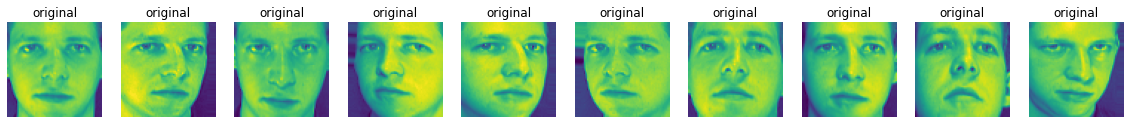

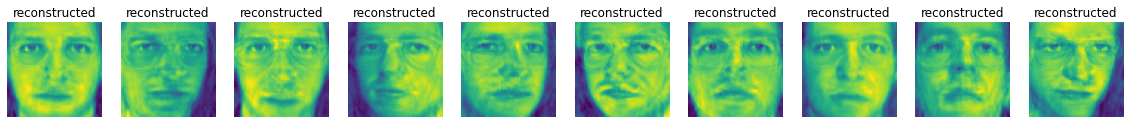

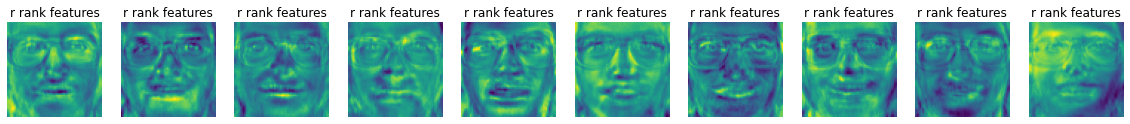

In [ ]:
model.eval()

with torch.no_grad():
    _,axs = plt.subplots(1, 10, figsize=(20, 20))
    for w,ax in zip(model.inp.numpy().transpose(), axs.flat):
        ax.imshow(w.reshape(64, 64))
        ax.axis('off')
        ax.set_title('original')

    _,axs = plt.subplots(1, 10, figsize=(20, 20))                   
    for w,ax in zip(pred.numpy().transpose(), axs.flat):
        ax.imshow(w.reshape(64, 64))
        ax.axis('off')
        ax.set_title('reconstructed')
        
        
    _,axs = plt.subplots(1, 10, figsize=(20, 20))
    for w,ax in zip(model.W1.numpy().transpose(), axs.flat):
        ax.imshow(w.reshape(64, 64))
        ax.axis('off')
        ax.set_title('r rank features')
        